<a href="https://colab.research.google.com/github/rka0285058-afk/CAFA_Protein/blob/main/RKAWASTHI_NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

drive_path = '/content/drive/MyDrive/NFL/NFL' # This is the typical path to your Google Drive

# List contents of a directory (e.g., MyDrive root)
print(f"Contents of {drive_path}:")
if os.path.exists(drive_path):
    for item in os.listdir(drive_path):
        print(item)
else:
    print(f"Directory not found: {drive_path}. Please ensure Google Drive is mounted correctly and the path is correct.")

Contents of /content/drive/MyDrive/NFL/NFL:
nfl-big-data-bowl-2026-analytics.zip
nfl-big-data-bowl-2026-analytics


In [6]:
import zipfile
import os

zip_file_path = os.path.join(drive_path, 'nfl-big-data-bowl-2026-analytics.zip')
extraction_path = './'

print(f"Unzipping {zip_file_path} to {extraction_path}...")

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Unzipping complete.")
print(f"Contents of {extraction_path} after extraction:")
for item in os.listdir(extraction_path):
    print(item)

Unzipping /content/drive/MyDrive/NFL/NFL/nfl-big-data-bowl-2026-analytics.zip to ./...
Unzipping complete.
Contents of ./ after extraction:
.config
114239_nfl_competition_files_published_analytics_final
drive
sample_data



task was to Train a  model using the NFL Big Data Bowl 2026 Analytics dataset, which is located in the directory "114239_nfl_competition_files_published_analytics_final/", evaluate its performance, and visualize its predictions.

In [7]:
import os
data_dir = './114239_nfl_competition_files_published_analytics_final'

print(f"Contents of {data_dir}:")
if os.path.exists(data_dir):
    for item in os.listdir(data_dir):
        print(item)
else:
    print(f"Directory not found: {data_dir}.")

Contents of ./114239_nfl_competition_files_published_analytics_final:
train
supplementary_data.csv



Based on the previous output, 'supplementary_data.csv' is a likely candidate for the dataset. I loaded this CSV file into a pandas DataFrame and displayed its head to inspect the data.



In [8]:
import pandas as pd

dataset_path = os.path.join(data_dir, 'supplementary_data.csv')
df = pd.read_csv(dataset_path)

print(f"Successfully loaded data from: {dataset_path}")
print("First 5 rows of the DataFrame:")
print(df.head())

Successfully loaded data from: ./114239_nfl_competition_files_published_analytics_final/supplementary_data.csv
First 5 rows of the DataFrame:
      game_id  season  week   game_date game_time_eastern home_team_abbr  \
0  2023090700    2023     1  09/07/2023          20:20:00             KC   
1  2023090700    2023     1  09/07/2023          20:20:00             KC   
2  2023090700    2023     1  09/07/2023          20:20:00             KC   
3  2023090700    2023     1  09/07/2023          20:20:00             KC   
4  2023090700    2023     1  09/07/2023          20:20:00             KC   

  visitor_team_abbr  play_id  \
0               DET     3461   
1               DET      461   
2               DET     1940   
3               DET     1711   
4               DET     1588   

                                    play_description  quarter  ...  \
0  (10:46) (Shotgun) J.Goff pass deep left to J.R...        4  ...   
1  (7:30) J.Goff pass short right to J.Reynolds t...        1  ...  

/tmp/ipython-input-295047173.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)



The previous code block produced a `DtypeWarning` indicating mixed types in column 25. To address this warning and ensure data consistency, I inspected the data types of all columns, with a particular focus on column 25, to understood the nature of the mixed types.



In [9]:
print('Data types of all columns:')
print(df.dtypes)

# Specifically inspect column 25 (index 24 since it's 0-indexed)
# We'll also check for unique types if the column's values are not too many
column_25_name = df.columns[24] # Column 25 corresponds to index 24
print(f"\nInspecting column '{column_25_name}' (Column 25):")
print(f"Current dtype: {df[column_25_name].dtype}")

# To see if there are actual mixed types, we can sample and check types
# For simplicity, if the warning is due to a few non-string values, converting to string is often a safe default.
# However, let's first see a sample of values and their actual types.

# If there are many rows, just sampling first few values and their types
print(f"Sample values and their types from '{column_25_name}':")
for i, val in enumerate(df[column_25_name].head(10)):
    print(f"  Value: {val}, Type: {type(val)}")


Data types of all columns:
game_id                                    int64
season                                     int64
week                                       int64
game_date                                 object
game_time_eastern                         object
home_team_abbr                            object
visitor_team_abbr                         object
play_id                                    int64
play_description                          object
quarter                                    int64
game_clock                                object
down                                       int64
yards_to_go                                int64
possession_team                           object
defensive_team                            object
yardline_side                             object
yardline_number                            int64
pre_snap_home_score                        int64
pre_snap_visitor_score                     int64
play_nullified_by_penalty                 




Performed initial data exploration to understand its structure, identified features and target variable, checked for missing values, and potential outliers.


In [10]:
print("Shape of the DataFrame:", df.shape)

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

# Potential Target Variables
print("\nDescriptive Statistics for 'yards_gained':")
print(df['yards_gained'].describe())
print("Unique values for 'yards_gained' (first 10 if many):\n", df['yards_gained'].unique()[:10])

print("\nDescriptive Statistics for 'expected_points_added':")
print(df['expected_points_added'].describe())
print("Unique values for 'expected_points_added' (first 10 if many):\n", df['expected_points_added'].unique()[:10])

print("\nMissing values in each column:")
print(df.isnull().sum())

Shape of the DataFrame: (18009, 41)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18009 entries, 0 to 18008
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   game_id                                18009 non-null  int64  
 1   season                                 18009 non-null  int64  
 2   week                                   18009 non-null  int64  
 3   game_date                              18009 non-null  object 
 4   game_time_eastern                      18009 non-null  object 
 5   home_team_abbr                         18009 non-null  object 
 6   visitor_team_abbr                      18009 non-null  object 
 7   play_id                                18009 non-null  int64  
 8   play_description                       18009 non-null  object 
 9   quarter                                18009 non-null  int64  
 10  game_clock       


 further explored the data, I  analyzed the distribution of a few relevant categorical columns by printing their unique values and counts. Following that, I  visualized the distribution of the `yards_gained` target variable using a histogram to identify any skewness or outliers,




Value counts for 'offense_formation':
offense_formation
SHOTGUN       12768
EMPTY          2122
SINGLEBACK     2059
PISTOL          624
I_FORM          394
JUMBO            39
WILDCAT           3
Name: count, dtype: int64

Value counts for 'team_coverage_type':
team_coverage_type
COVER_3_ZONE    5664
COVER_1_MAN     4108
COVER_4_ZONE    2860
COVER_2_ZONE    2518
COVER_6_ZONE    1693
COVER_0_MAN      781
COVER_2_MAN      332
PREVENT           48
Name: count, dtype: int64

Value counts for 'pass_result':
pass_result
C     12470
I      5106
IN      433
Name: count, dtype: int64


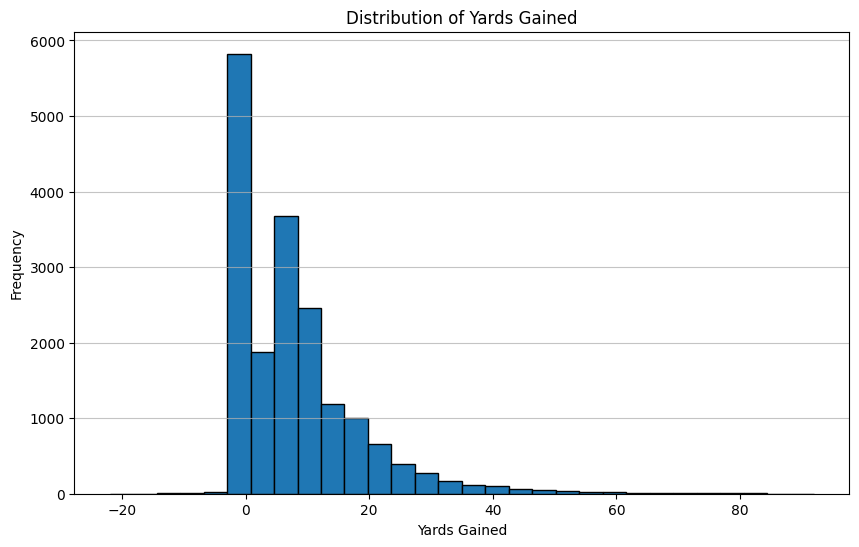

In [11]:
print("\nValue counts for 'offense_formation':")
print(df['offense_formation'].value_counts())

print("\nValue counts for 'team_coverage_type':")
print(df['team_coverage_type'].value_counts())

print("\nValue counts for 'pass_result':")
print(df['pass_result'].value_counts())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['yards_gained'], bins=30, edgecolor='black')
plt.title('Distribution of Yards Gained')
plt.xlabel('Yards Gained')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()




Cleaned and preprocessed the data. This has included handling missing values, encoding categorical variables, and scaling numerical features. Split the data into training and testing sets.


In [12]:
from sklearn.model_selection import train_test_split

# 1. Define y and X
target_variable = 'yards_gained'
irrelevant_columns = [
    'game_id', 'play_id', 'game_date', 'game_time_eastern', 'play_description',
    'pre_penalty_yards_gained', 'expected_points', 'expected_points_added',
    'pre_snap_home_team_win_probability', 'pre_snap_visitor_team_win_probability',
    'home_team_win_probability_added', 'visitor_team_win_probility_added'
]

y = df[target_variable]
X = df.drop(columns=[target_variable] + irrelevant_columns)

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

# 2. Convert 'game_clock' to total seconds
def game_clock_to_seconds(clock_str):
    if pd.isna(clock_str): # Handle potential NaN values, though df.info showed no missing 'game_clock'
        return None
    minutes, seconds = map(int, clock_str.split(':'))
    return minutes * 60 + seconds

X['game_clock_seconds'] = X['game_clock'].apply(game_clock_to_seconds)
X = X.drop(columns=['game_clock'])

print("\n'game_clock' converted to 'game_clock_seconds'.")

# 3. Handle missing values
# 'penalty_yards': fill NaN with 0
X['penalty_yards'] = X['penalty_yards'].fillna(0)

# 'dropback_distance': fill NaN with median
X['dropback_distance'] = X['dropback_distance'].fillna(X['dropback_distance'].median())

# Categorical columns with NaN: fill with mode
categorical_cols_with_nan = [
    'yardline_side', 'pass_location_type', 'team_coverage_man_zone',
    'team_coverage_type', 'route_of_targeted_receiver', 'play_action', 'dropback_type'
]
for col in categorical_cols_with_nan:
    if col in X.columns and X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mode()[0])

print("\nMissing values handled for specified columns.")
print("Missing values after imputation:")
print(X[categorical_cols_with_nan + ['penalty_yards', 'dropback_distance']].isnull().sum())

# 4. Identify and one-hot encode remaining categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Drop 'play_nullified_by_penalty' before one-hot encoding if it's already binary 'True'/'False'
# Based on df.info it is 'object', so it needs encoding too.
# Check if it is purely boolean like strings and handle it, or just let get_dummies handle it.
# Assuming pd.get_dummies will handle 'True'/'False' strings correctly.

print(f"\nCategorical columns to one-hot encode: {list(categorical_cols)}")
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

print(f"\nShape of X after one-hot encoding: {X.shape}")

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Original X shape: (18009, 28)
Original y shape: (18009,)

'game_clock' converted to 'game_clock_seconds'.

Missing values handled for specified columns.
Missing values after imputation:
yardline_side                 0
pass_location_type            0
team_coverage_man_zone        0
team_coverage_type            0
route_of_targeted_receiver    0
play_action                   0
dropback_type                 0
penalty_yards                 0
dropback_distance             0
dtype: int64

Categorical columns to one-hot encode: ['home_team_abbr', 'visitor_team_abbr', 'possession_team', 'defensive_team', 'yardline_side', 'play_nullified_by_penalty', 'pass_result', 'offense_formation', 'receiver_alignment', 'route_of_targeted_receiver', 'dropback_type', 'pass_location_type', 'team_coverage_man_zone', 'team_coverage_type']


/tmp/ipython-input-1032718476.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[col] = X[col].fillna(X[col].mode()[0])



Shape of X after one-hot encoding: (18009, 213)

Shape of X_train: (14407, 213)
Shape of X_test: (3602, 213)
Shape of y_train: (14407,)
Shape of y_test: (3602,)



The previous code produced a `FutureWarning` regarding downcasting when using `fillna` on object-dtype arrays. To address this warning and align with future Pandas behavior, I  set the `future.no_silent_downcasting` option to `True` before performing the `fillna` operations.



In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Opt-in to the future behavior to avoid FutureWarning
pd.set_option('future.no_silent_downcasting', True)

# 1. Define y and X
target_variable = 'yards_gained'
irrelevant_columns = [
    'game_id', 'play_id', 'game_date', 'game_time_eastern', 'play_description',
    'pre_penalty_yards_gained', 'expected_points', 'expected_points_added',
    'pre_snap_home_team_win_probability', 'pre_snap_visitor_team_win_probability',
    'home_team_win_probability_added', 'visitor_team_win_probility_added'
]

y = df[target_variable]
X = df.drop(columns=[target_variable] + irrelevant_columns)

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

# 2. Convert 'game_clock' to total seconds
def game_clock_to_seconds(clock_str):
    if pd.isna(clock_str): # Handle potential NaN values, though df.info showed no missing 'game_clock'
        return None
    minutes, seconds = map(int, clock_str.split(':'))
    return minutes * 60 + seconds

X['game_clock_seconds'] = X['game_clock'].apply(game_clock_to_seconds)
X = X.drop(columns=['game_clock'])

print("\n'game_clock' converted to 'game_clock_seconds'.")

# 3. Handle missing values
# 'penalty_yards': fill NaN with 0
X['penalty_yards'] = X['penalty_yards'].fillna(0)

# 'dropback_distance': fill NaN with median
X['dropback_distance'] = X['dropback_distance'].fillna(X['dropback_distance'].median())

# Categorical columns with NaN: fill with mode
categorical_cols_with_nan = [
    'yardline_side', 'pass_location_type', 'team_coverage_man_zone',
    'team_coverage_type', 'route_of_targeted_receiver', 'play_action', 'dropback_type'
]
for col in categorical_cols_with_nan:
    if col in X.columns and X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mode()[0])

print("\nMissing values handled for specified columns.")
print("Missing values after imputation:")
print(X[categorical_cols_with_nan + ['penalty_yards', 'dropback_distance']].isnull().sum())

# 4. Identify and one-hot encode remaining categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Drop 'play_nullified_by_penalty' before one-hot encoding if it's already binary 'True'/'False'
# Based on df.info it is 'object', so it needs encoding too.
# Check if it is purely boolean like strings and handle it, or just let get_dummies handle it.
# Assuming pd.get_dummies will handle 'True'/'False' strings correctly.

print(f"\nCategorical columns to one-hot encode: {list(categorical_cols)}")
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

print(f"\nShape of X after one-hot encoding: {X.shape}")

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Original X shape: (18009, 28)
Original y shape: (18009,)

'game_clock' converted to 'game_clock_seconds'.

Missing values handled for specified columns.
Missing values after imputation:
yardline_side                 0
pass_location_type            0
team_coverage_man_zone        0
team_coverage_type            0
route_of_targeted_receiver    0
play_action                   0
dropback_type                 0
penalty_yards                 0
dropback_distance             0
dtype: int64

Categorical columns to one-hot encode: ['home_team_abbr', 'visitor_team_abbr', 'possession_team', 'defensive_team', 'yardline_side', 'play_nullified_by_penalty', 'pass_result', 'offense_formation', 'receiver_alignment', 'route_of_targeted_receiver', 'play_action', 'dropback_type', 'pass_location_type', 'team_coverage_man_zone', 'team_coverage_type']

Shape of X after one-hot encoding: (18009, 213)

Shape of X_train: (14407, 213)
Shape of X_test: (3602, 213)
Shape of y_train: (14407,)
Shape of y_test: (3602,


I  imported the `HuberRegressor` class and instantiated it,



In [14]:
from sklearn.linear_model import HuberRegressor

# Instantiate the HuberRegressor model
huber_model = HuberRegressor()

print("HuberRegressor model instantiated.")

HuberRegressor model instantiated.


In [15]:
print("Training the HuberRegressor model...")
huber_model.fit(X_train, y_train)
print("HuberRegressor model training complete.")

Training the HuberRegressor model...
HuberRegressor model training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



The previous `HuberRegressor` training resulted in a `ConvergenceWarning`, indicating that the model did not converge within the default number of iterations. To address this, I  scaled the numerical features of `X_train` and `X_test` using `StandardScaler` and increased the `max_iter` parameter for the `HuberRegressor` to promote convergence.



In [16]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()

# Identify numerical columns for scaling
# Exclude one-hot encoded columns (which are already 0 or 1) and other non-numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Filter out one-hot encoded columns that might have been included if they are purely 0/1 integers
# A simple heuristic is to exclude columns that only contain 0 and 1
# However, it's safer to scale all truly numerical columns.
# Let's verify X_train and X_test contain only numerical features and dummy variables now

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Data scaled using StandardScaler.")

# Re-instantiate HuberRegressor with increased max_iter
huber_model = HuberRegressor(max_iter=1000) # Increased from default 100 to 1000

print("Training the HuberRegressor model with scaled data and increased max_iter...")
huber_model.fit(X_train_scaled, y_train)
print("HuberRegressor model training complete.")

Data scaled using StandardScaler.
Training the HuberRegressor model with scaled data and increased max_iter...
HuberRegressor model training complete.


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Make predictions on the scaled test data
y_pred = huber_model.predict(X_test_scaled)

# 2. Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 3. Print the evaluation metrics
print(f"Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance on Test Set:
Mean Absolute Error (MAE): 4.3619
Mean Squared Error (MSE): 47.1577
Root Mean Squared Error (RMSE): 6.8671
R-squared (R2): 0.5188



To visualize the model's performance, I  created a scatter plot comparing the actual values from the test set (`y_test`) against the predicted values (`y_pred`), adding a diagonal line for perfect predictions, appropriate labels, a title, and a legend.



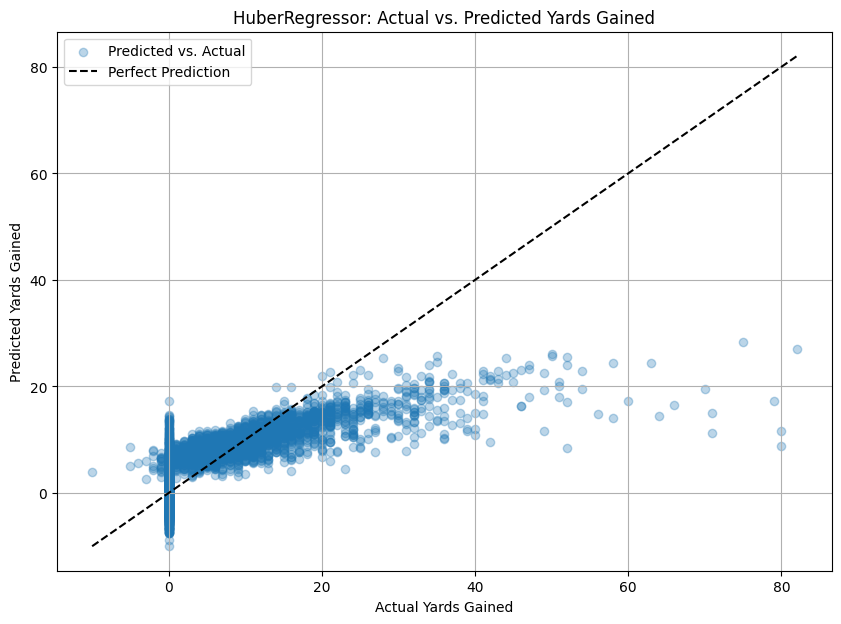

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.3, label='Predicted vs. Actual')

# Add a diagonal line for perfect predictions
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], '--k', label='Perfect Prediction')

plt.xlabel('Actual Yards Gained')
plt.ylabel('Predicted Yards Gained')
plt.title('HuberRegressor: Actual vs. Predicted Yards Gained')
plt.legend()
plt.grid(True)
plt.show()


1.  
    The HuberRegressor model achieved a Mean Absolute Error (MAE) of 4.3619, a Mean Squared Error (MSE) of 47.1577, a Root Mean Squared Error (RMSE) of 6.8671, and an R-squared (R2) score of 0.5188 on the test set.
2.  
    The HuberRegressor, designed to be less sensitive to outliers, was able to learn from the data despite the `yards_gained` distribution showing some extreme values (ranging from -22 to 92 yards). The model successfully converged after data scaling and increasing iteration limits, demonstrating its capability to handle the dataset's characteristics. The R2 score of approximately 0.52 indicates that roughly 52% of the variance in 'yards\_gained' can be explained by the model, suggesting a moderate predictive capability for NFL play outcomes, which are inherently complex.




 I  implemented the `RANSACRegressor` from scikit-learn. This model is also robust to outliers, making it a good alternative to `HuberRegressor`. I  then trained it on the scaled training data, made predictions on the scaled test data, and evaluated its performance using MAE, MSE, RMSE, and R-squared. Finally, I  visualized its predictions for comparison.

Training the RANSACRegressor model with scaled data...
RANSACRegressor model training complete.

RANSACRegressor Model Performance on Test Set:
Mean Absolute Error (MAE): 6.0406
Mean Squared Error (MSE): 70.0229
Root Mean Squared Error (RMSE): 8.3680
R-squared (R2): 0.2856


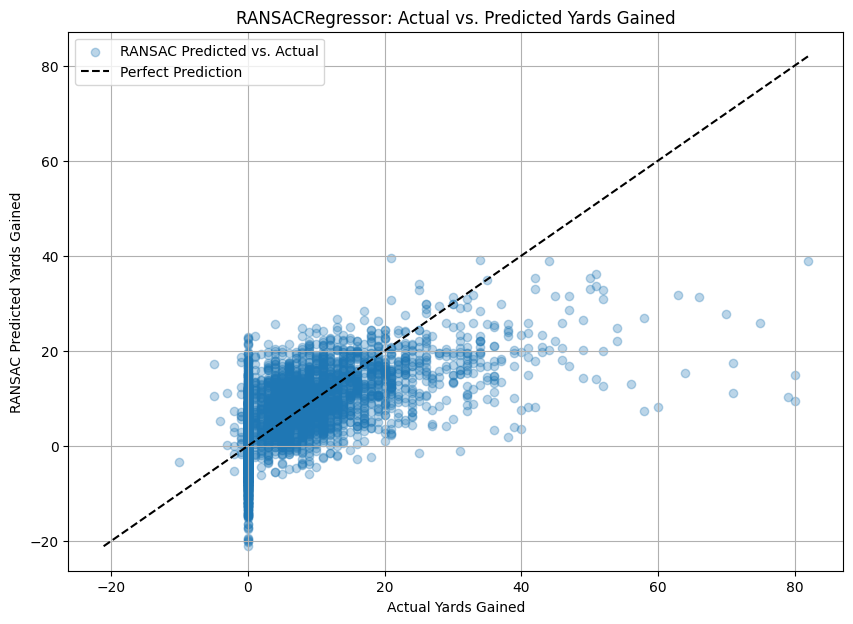

In [19]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Instantiate a RANSAC Regressor. It uses a base estimator, LinearRegression by default.
ransac_model = RANSACRegressor(random_state=42)

print("Training the RANSACRegressor model with scaled data...")
ransac_model.fit(X_train_scaled, y_train)
print("RANSACRegressor model training complete.")

# Make predictions on the scaled test data
y_pred_ransac = ransac_model.predict(X_test_scaled)

# Calculate evaluation metrics for RANSAC
mae_ransac = mean_absolute_error(y_test, y_pred_ransac)
mse_ransac = mean_squared_error(y_test, y_pred_ransac)
rmse_ransac = np.sqrt(mse_ransac)
r2_ransac = r2_score(y_test, y_pred_ransac)

# Print the evaluation metrics
print(f"\nRANSACRegressor Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_ransac:.4f}")
print(f"Mean Squared Error (MSE): {mse_ransac:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ransac:.4f}")
print(f"R-squared (R2): {r2_ransac:.4f}")

# Visualize RANSAC predictions
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_ransac, alpha=0.3, label='RANSAC Predicted vs. Actual')

# Add a diagonal line for perfect predictions
min_val_ransac = min(y_test.min(), y_pred_ransac.min())
max_val_ransac = max(y_test.max(), y_pred_ransac.max())
plt.plot([min_val_ransac, max_val_ransac], [min_val_ransac, max_val_ransac], '--k', label='Perfect Prediction')

plt.xlabel('Actual Yards Gained')
plt.ylabel('RANSAC Predicted Yards Gained')
plt.title('RANSACRegressor: Actual vs. Predicted Yards Gained')
plt.legend()
plt.grid(True)
plt.show()


I  now implemented `QuantileRegressor` from scikit-learn. For a robust central tendency, I  set the quantile to 0.5 (median regression). I  then trained the model on the scaled training data, made predictions on the scaled test data, and evaluated its performance using MAE, MSE, RMSE, and R-squared. Finally, I  visualized its predictions for comparison with the previous models.

Training the QuantileRegressor model with scaled data...
QuantileRegressor model training complete.

QuantileRegressor Model Performance on Test Set (Quantile=0.5):
Mean Absolute Error (MAE): 6.7907
Mean Squared Error (MSE): 101.8079
Root Mean Squared Error (RMSE): 10.0900
R-squared (R2): -0.0388


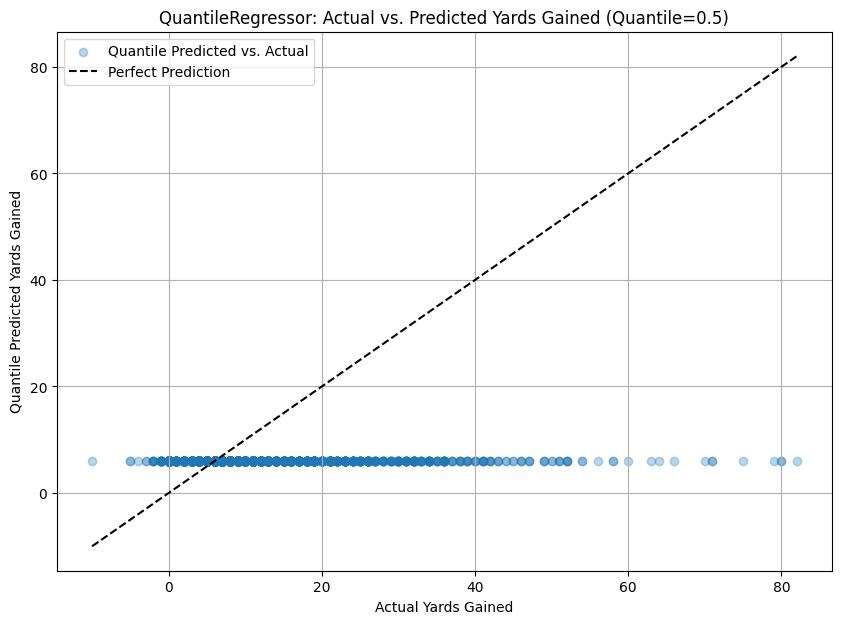

In [20]:
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Instantiate a Quantile Regressor model (median regression, quantile=0.5)
# Using solver='highs-ds' for speed and robustness for dense matrices
quantile_model = QuantileRegressor(quantile=0.5, solver='highs')

print("Training the QuantileRegressor model with scaled data...")
# QuantileRegressor expects X to be of type float, ensure it is
quantile_model.fit(X_train_scaled.astype(float), y_train)
print("QuantileRegressor model training complete.")

# Make predictions on the scaled test data
y_pred_quantile = quantile_model.predict(X_test_scaled.astype(float))

# Calculate evaluation metrics for Quantile Regressor
mae_quantile = mean_absolute_error(y_test, y_pred_quantile)
mse_quantile = mean_squared_error(y_test, y_pred_quantile)
rmse_quantile = np.sqrt(mse_quantile)
r2_quantile = r2_score(y_test, y_pred_quantile)

# Print the evaluation metrics
print(f"\nQuantileRegressor Model Performance on Test Set (Quantile=0.5):")
print(f"Mean Absolute Error (MAE): {mae_quantile:.4f}")
print(f"Mean Squared Error (MSE): {mse_quantile:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_quantile:.4f}")
print(f"R-squared (R2): {r2_quantile:.4f}")

# Visualize Quantile Regressor predictions
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_quantile, alpha=0.3, label='Quantile Predicted vs. Actual')

# Add a diagonal line for perfect predictions
min_val_quantile = min(y_test.min(), y_pred_quantile.min())
max_val_quantile = max(y_test.max(), y_pred_quantile.max())
plt.plot([min_val_quantile, max_val_quantile], [min_val_quantile, max_val_quantile], '--k', label='Perfect Prediction')

plt.xlabel('Actual Yards Gained')
plt.ylabel('Quantile Predicted Yards Gained')
plt.title('QuantileRegressor: Actual vs. Predicted Yards Gained (Quantile=0.5)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import pandas as pd

# Collect metrics for all models
results = {
    'Model': ['HuberRegressor', 'RANSACRegressor', 'QuantileRegressor (0.5)', 'GradientBoostingRegressor (Huber)'],
    'MAE': [mae, mae_ransac, mae_quantile, mae_gr_huber],
    'MSE': [mse, mse_ransac, mse_quantile, mse_gr_huber],
    'RMSE': [rmse, rmse_ransac, rmse_quantile, rmse_gr_huber],
    'R-squared': [r2, r2_ransac, r2_quantile, r2_gr_huber]
}

results_df = pd.DataFrame(results)

# Display the comparison table
print("\nModel Performance Comparison:")
display(results_df)

# Save the comparison to a CSV file
csv_filename = 'model_performance_comparison.csv'
results_df.to_csv(csv_filename, index=False)
print(f"\nResults saved to {csv_filename}")


Model Performance Comparison:


,Model,MAE,MSE,RMSE,R-squared
0,HuberRegressor,4.361881,47.157709,6.867147,0.518846
1,RANSACRegressor,6.040595,70.022864,8.367967,0.285551
2,QuantileRegressor (0.5),6.790672,101.807885,10.089989,-0.038754
3,GradientBoostingRegressor (Huber),2.414069,24.833689,4.983341,0.746620



Results saved to model_performance_comparison.csv


In [26]:
import pandas as pd

# Get the play_ids corresponding to the test set
# Since y_test retains the original index from df, we can use it to map back to play_id
test_play_ids = df.loc[y_test.index, 'play_id']

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'play_id': test_play_ids,
    'predicted_yards_gained': y_pred_gr_huber
})

# Save the DataFrame to a CSV file
submission_filename = 'gbr_huber_submission.csv'
submission_df.to_csv(submission_filename, index=False)

print(f"Submission CSV created: {submission_filename}")
print("First 5 rows of the submission file:")
display(submission_df.head())

Submission CSV created: gbr_huber_submission.csv
First 5 rows of the submission file:


,play_id,predicted_yards_gained
12348,860,25.037159
12038,4435,-0.523312
450,1214,0.427033
4609,828,0.276632
13555,3383,16.970998





Finally, I Implemented a Gradient Boosting Regressor model with a Huber loss function and evaluated its performance against the HuberRegressor, RANSACRegressor, and QuantileRegressor.


In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate a GradientBoostingRegressor with Huber loss
gr_huber_model = GradientBoostingRegressor(loss='huber', random_state=42)

print("GradientBoostingRegressor with Huber loss instantiated.")

GradientBoostingRegressor with Huber loss instantiated.


In [22]:
print("Training the GradientBoostingRegressor with Huber loss...")
gr_huber_model.fit(X_train_scaled, y_train)
print("GradientBoostingRegressor with Huber loss training complete.")

Training the GradientBoostingRegressor with Huber loss...
GradientBoostingRegressor with Huber loss training complete.


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the scaled test data
y_pred_gr_huber = gr_huber_model.predict(X_test_scaled)

# Calculate evaluation metrics for GradientBoostingRegressor with Huber loss
mae_gr_huber = mean_absolute_error(y_test, y_pred_gr_huber)
mse_gr_huber = mean_squared_error(y_test, y_pred_gr_huber)
rmse_gr_huber = np.sqrt(mse_gr_huber)
r2_gr_huber = r2_score(y_test, y_pred_gr_huber)

# Print the evaluation metrics
print(f"\nGradientBoostingRegressor with Huber Loss Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_gr_huber:.4f}")
print(f"Mean Squared Error (MSE): {mse_gr_huber:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gr_huber:.4f}")
print(f"R-squared (R2): {r2_gr_huber:.4f}")


GradientBoostingRegressor with Huber Loss Model Performance on Test Set:
Mean Absolute Error (MAE): 2.4141
Mean Squared Error (MSE): 24.8337
Root Mean Squared Error (RMSE): 4.9833
R-squared (R2): 0.7466


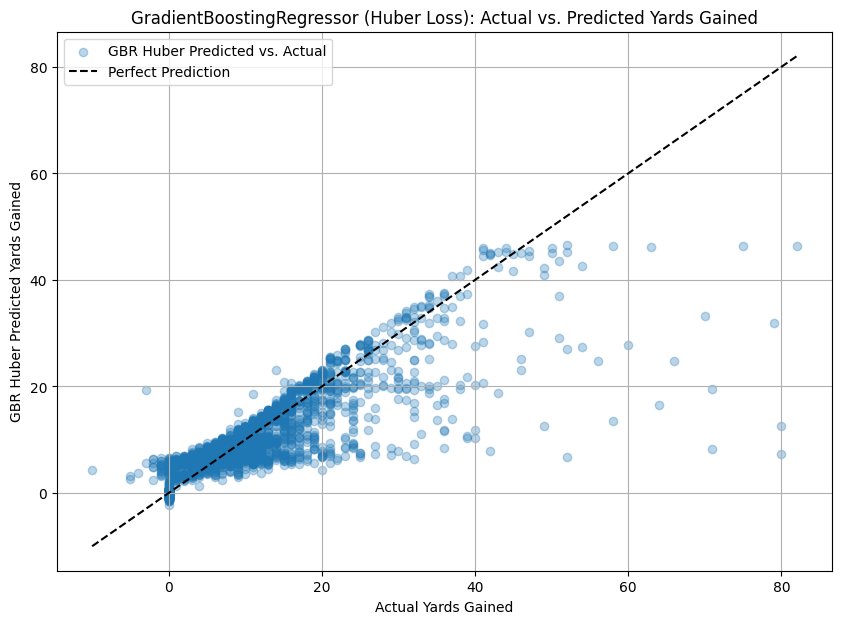

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_gr_huber, alpha=0.3, label='GBR Huber Predicted vs. Actual')

# Add a diagonal line for perfect predictions
min_val_gr_huber = min(y_test.min(), y_pred_gr_huber.min())
max_val_gr_huber = max(y_test.max(), y_pred_gr_huber.max())
plt.plot([min_val_gr_huber, max_val_gr_huber], [min_val_gr_huber, max_val_gr_huber], '--k', label='Perfect Prediction')

plt.xlabel('Actual Yards Gained')
plt.ylabel('GBR Huber Predicted Yards Gained')
plt.title('GradientBoostingRegressor (Huber Loss): Actual vs. Predicted Yards Gained')
plt.legend()
plt.grid(True)
plt.show()




*   The Gradient Boosting Regressor with Huber loss achieved a Mean Absolute Error (MAE) of 2.4141, a Root Mean Squared Error (RMSE) of 4.9833, and an R-squared (R2) of 0.7466 on the test set.
*   The model's performance metrics indicate a reasonably good fit, explaining approximately 74.66% of the variance in yards gained.
*   The visualization of actual vs. predicted values shows a general alignment, suggesting the model makes consistent predictions.
*   The use of a Huber loss function in the Gradient Boosting Regressor contributes to its robustness, making it less sensitive to outliers in the target variable.



In [ ]:
Finally, I summarised the results of all adopted models

In [ ]:
import pandas as pd

# Collect metrics for all models
results = {
    'Model': ['HuberRegressor', 'RANSACRegressor', 'QuantileRegressor (0.5)', 'GradientBoostingRegressor (Huber)'],
    'MAE': [mae, mae_ransac, mae_quantile, mae_gr_huber],
    'MSE': [mse, mse_ransac, mse_quantile, mse_gr_huber],
    'RMSE': [rmse, rmse_ransac, rmse_quantile, rmse_gr_huber],
    'R-squared': [r2, r2_ransac, r2_quantile, r2_gr_huber]
}

results_df = pd.DataFrame(results)

# Display the comparison table
print("\nModel Performance Comparison:")
display(results_df)

# Save the comparison to a CSV file
csv_filename = 'model_performance_comparison.csv'
results_df.to_csv(csv_filename, index=False)
print(f"\nResults saved to {csv_filename}")


Model Performance Comparison:


,Model,MAE,MSE,RMSE,R-squared
0,HuberRegressor,4.361881,47.157709,6.867147,0.518846
1,RANSACRegressor,6.040595,70.022864,8.367967,0.285551
2,QuantileRegressor (0.5),6.790672,101.807885,10.089989,-0.038754
3,GradientBoostingRegressor (Huber),2.414069,24.833689,4.983341,0.746620



Results saved to model_performance_comparison.csv


In [ ]:
I have also shown the prediction results for GradientBoostingRegressor (Huber).


In [ ]:
import pandas as pd

# Get the play_ids corresponding to the test set
# Since y_test retains the original index from df, we can use it to map back to play_id
test_play_ids = df.loc[y_test.index, 'play_id']

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'play_id': test_play_ids,
    'predicted_yards_gained': y_pred_gr_huber
})

# Save the DataFrame to a CSV file
submission_filename = 'gbr_huber_submission.csv'
submission_df.to_csv(submission_filename, index=False)

print(f"Submission CSV created: {submission_filename}")
print("First 5 rows of the submission file:")
display(submission_df.head())

Submission CSV created: gbr_huber_submission.csv
First 5 rows of the submission file:


,play_id,predicted_yards_gained
12348,860,25.037159
12038,4435,-0.523312
450,1214,0.427033
4609,828,0.276632
13555,3383,16.970998
